# Análise dos números da Mega Sena

Projeto realizado com os dados históricos dos sorteios realizados até 10/08/2019: <u>Concurso 2178</u> <br>

* <b>Parte 1:</b> Análise Exploratória dos Dados <br>
* <b>Parte 2:</b> Testes Estatísticos <br>
* <b>Parte 3:</b> Utilizando LSTM para prever um jogo vencedor

site: http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/

## Análise Exploratória dos Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Comando para que os gráficos sejam apresentados no próprio notebook
%matplotlib inline

In [2]:
# Importando dataset
mega_sena = pd.read_excel('Sorteios.xlsx', index_col='Concurso', parse_dates=['Data Sorteio'])

In [3]:
# Definindo nome das colunas
names = ['Data', '1_n', '2_n','3_n', '4_n', '5_n', '6_n', 'Arrec', 'Sena', 'Valor_sena', 'Quina',
         'Valor_quina', 'Quadra', 'Valor_Quadra', 'Acumulado', 'Valor_Acumulado', 'Estimativa', 'Mega_virada']

In [4]:
# Alterando os nomes para facilitar a manipulação
mega_sena.columns = names

# Vizualizando as primeiras linhas
mega_sena.head() 

,Data,1_n,2_n,3_n,4_n,5_n,6_n,Arrec,Sena,Valor_sena,Quina,Valor_quina,Quadra,Valor_Quadra,Acumulado,Valor_Acumulado,Estimativa,Mega_virada
Concurso,,,,,,,,,,,,,,,,,,
1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0,0.0
2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0,0.0
3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0,0.0
4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0,0.0
5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0,0.0


In [5]:
# Verificando os tipos dos dados importados
mega_sena.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2178 entries, 1 to 2178
Data columns (total 18 columns):
Data               2178 non-null datetime64[ns]
1_n                2178 non-null int64
2_n                2178 non-null int64
3_n                2178 non-null int64
4_n                2178 non-null int64
5_n                2178 non-null int64
6_n                2178 non-null int64
Arrec              2178 non-null float64
Sena               2178 non-null int64
Valor_sena         2178 non-null float64
Quina              2178 non-null int64
Valor_quina        2178 non-null float64
Quadra             2178 non-null int64
Valor_Quadra       2178 non-null float64
Acumulado          2178 non-null object
Valor_Acumulado    2178 non-null float64
Estimativa         2178 non-null int64
Mega_virada        2178 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(10), object(1)
memory usage: 323.3+ KB


In [6]:
# Realizando slice para plotagem das informações
sorteios_ano = mega_sena.groupby(mega_sena.Data.dt.year).count().iloc[:, 0]

ganhadores_ano = mega_sena.groupby(mega_sena.Data.dt.year).sum().loc[:, ['Sena']]

premios_ano = mega_sena.groupby(mega_sena.Data.dt.year).sum().loc[:, ['Valor_sena']]

arrec_ano = mega_sena.groupby(mega_sena.Data.dt.year).sum().loc[:, ['Arrec']]

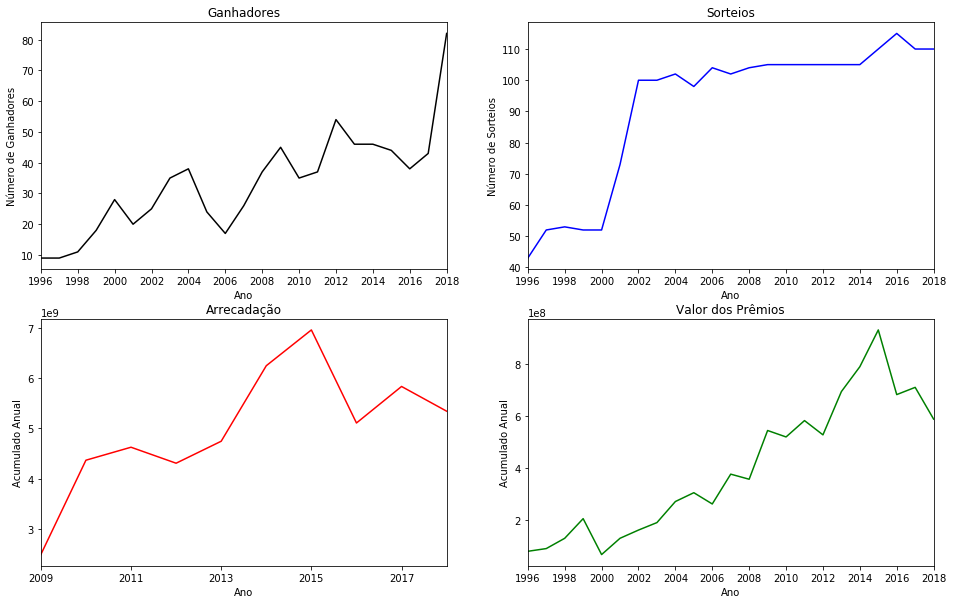

In [7]:
# Gráficos 

# Definindo o tamanho da figura de plotagem
plt.figure(figsize=(16,10))

# Gráfico 1
plt.subplot(221)
plt.plot(ganhadores_ano.loc[:'2018'], color='black')
plt.xlim(1996, 2018)
plt.xticks(range(1996, 2019, 2))
plt.title('Ganhadores')
plt.xlabel('Ano')
plt.ylabel('Número de Ganhadores')

# Gráfico 2
plt.subplot(222)
plt.plot(sorteios_ano.loc[:'2018'], color='blue')
plt.xlim(1996, 2018)
plt.xticks(range(1996, 2019, 2))
plt.title('Sorteios')
plt.xlabel('Ano')
plt.ylabel('Número de Sorteios')

# Gráfico 3
plt.subplot(223)
plt.plot(arrec_ano.loc['2009':'2018'], color='red')
plt.xlim(2009, 2018)
plt.xticks(range(2009, 2019, 2))
plt.title('Arrecadação')
plt.xlabel('Ano')
plt.ylabel('Acumulado Anual')

# Gráfico 4
plt.subplot(224)
plt.plot(premios_ano.loc[:'2018'], color='green')
plt.xlim(1996, 2018)
plt.xticks(range(1996, 2019, 2))
plt.title('Valor dos Prêmios')
plt.xlabel('Ano')
plt.ylabel('Acumulado Anual')

plt.show()

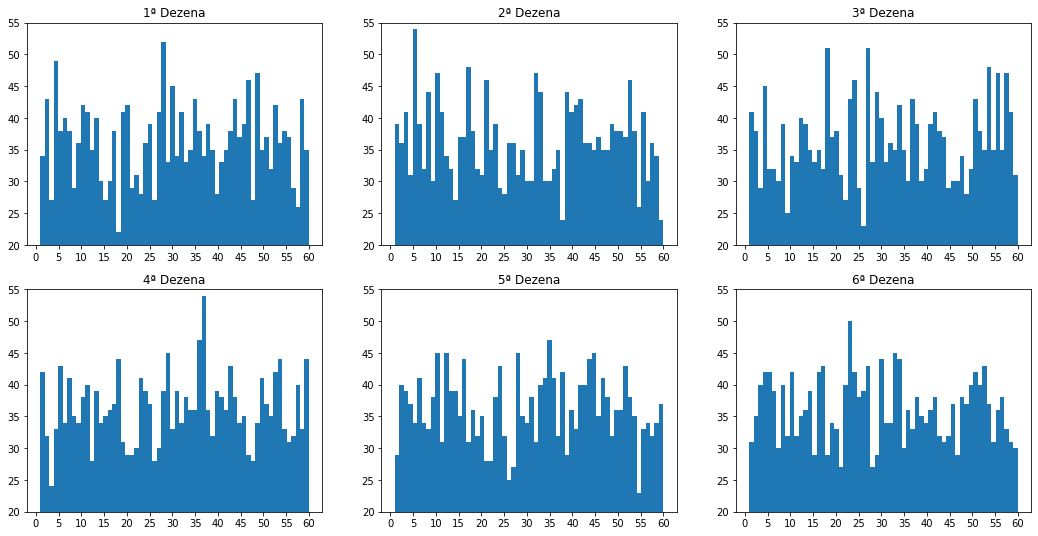

In [8]:
# Avaliando a distribuição de frêquencia entre os números sorteados em cada dezena

mega_dezenas = mega_sena.loc[:, '1_n':'6_n']

plt.figure(figsize=(18,9))

for i, n in enumerate(mega_dezenas.columns):
    plt.subplot(231+i)
    plt.hist(mega_dezenas[n], bins=60)
    plt.xticks(range(0, 61, 5))
    plt.yticks(range(20, 56, 5))
    plt.ylim(20, 55)
    plt.title(f'{i+1}ª Dezena')
  
plt.show()

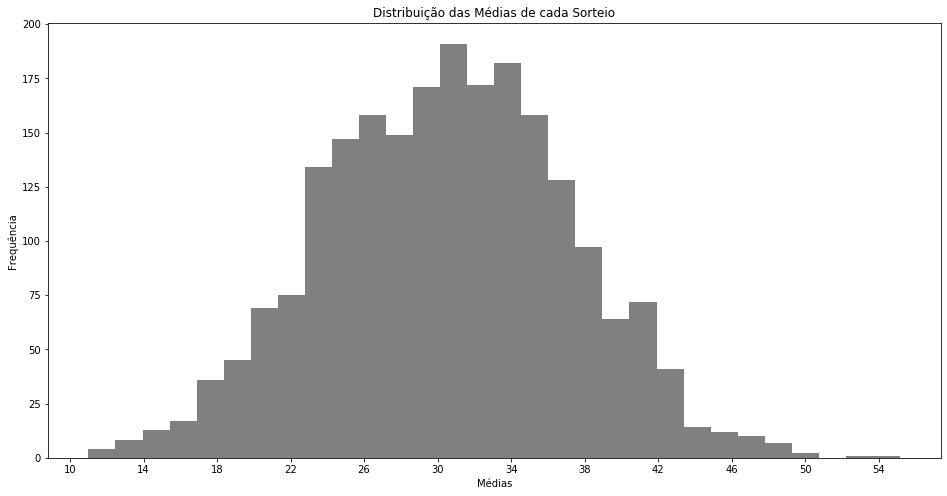

In [9]:
# Avaliando a distribuição das médias entre os 6 números sorteados em cada sorteio.
# Como esperado, temos uma distribuição normal. 

plt.figure(figsize=(16,8))
plt.hist(mega_dezenas.agg(func=['mean'], axis=1)['mean'], bins=30, color='gray')
plt.xticks(range(10, 58, 4))
plt.title('Distribuição das Médias de cada Sorteio')
plt.xlabel('Médias')
plt.ylabel('Frequência')
plt.show()

In [10]:
# Preparando o dataset para avaliação geral dos números
dezenas = mega_dezenas.reset_index(level=0)

dezenas = dezenas.melt(id_vars='Concurso', value_vars=['1_n', '2_n', '3_n', '4_n', '5_n', '6_n'], var_name='Dezena',
                            value_name='Numero')

dezenas.sort_values(['Concurso', 'Dezena']).reset_index(drop=True).head(12)

,Concurso,Dezena,Numero
0,1,1_n,41
1,1,2_n,5
2,1,3_n,4
3,1,4_n,52
4,1,5_n,30
5,1,6_n,33
6,2,1_n,9
7,2,2_n,39
8,2,3_n,37
9,2,4_n,49


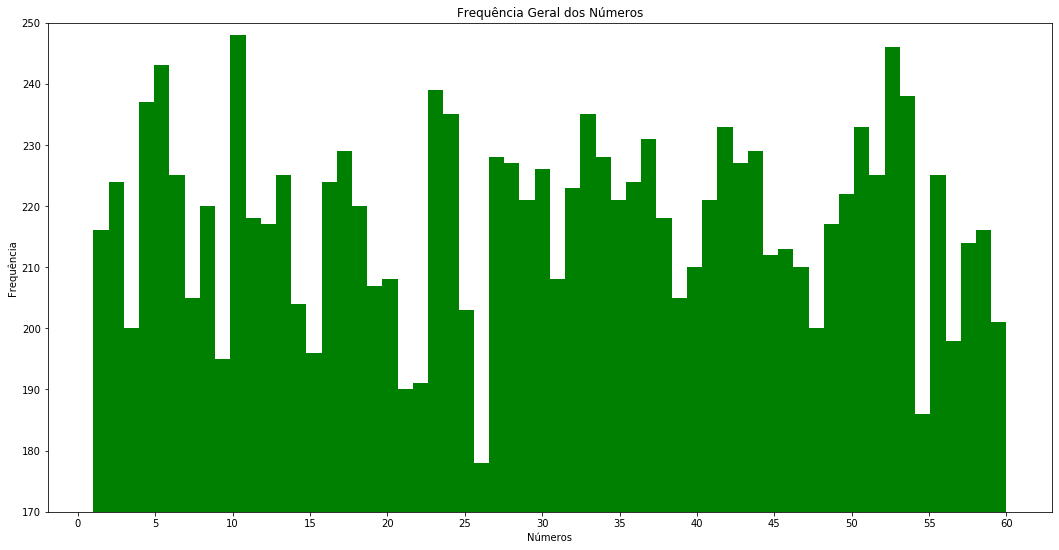

In [11]:
# Avaliando a distribuição de frequência geral dos números, descartando a dezena em que foi sorteado.

plt.figure(figsize=(18,9))
plt.hist(dezenas['Numero'], bins=60, color='green')
plt.xticks(range(0, 61, 5))
plt.ylim(170, 250)
plt.title('Frequência Geral dos Números')
plt.xlabel('Números')
plt.ylabel('Frequência')
plt.show()

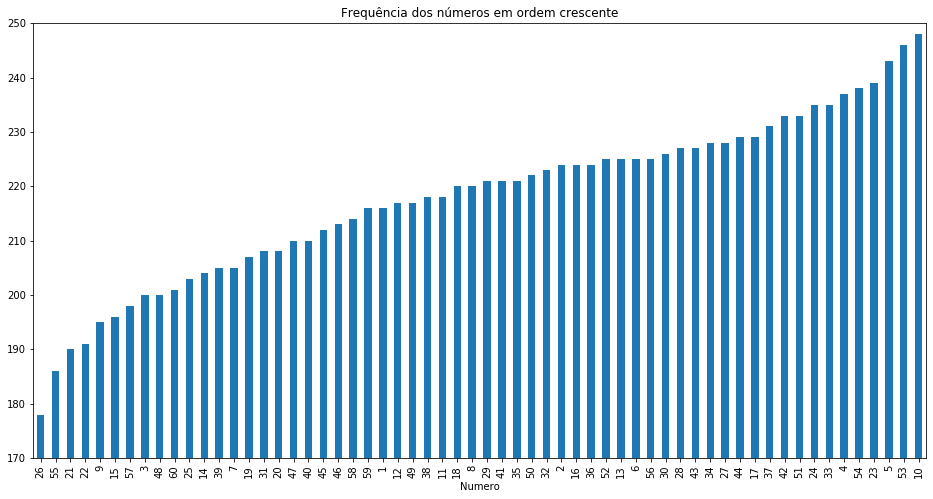

In [12]:
# Organizando o gráfico em ordem crescente de frequência

freq = dezenas.groupby('Numero').count().iloc[:,0]

plt.figure(figsize=(16,8))
freq.sort_values().plot(kind='bar')
plt.title('Frequência dos números em ordem crescente')
plt.ylim(170, 250)
plt.show()

In [13]:
# Organizando os dados para facilitar a leitura dos números mais/menos frequentes.

freq_num = freq.sort_values()
freq_num2 = freq_num.reset_index()
freq_num2

menos = []
mais = []

print('\033[1mOS NÚMEROS QUE MENOS APARECERAM FORAM:\033[m\n')

for i in range(6):
    print(f'\033[4m{freq_num2["Numero"][i]}\033[m que apareceu em \033[4m{freq_num2["Concurso"][i]}\033[m sorteios')
    menos.append(freq_num2["Numero"][i])
          
print()
print('\033[1mOS NÚMEROS QUE MAIS APARECERAM FORAM:\033[m\n')

for i in range(59, 53, -1):
    print(f'\033[4m{freq_num2["Numero"][i]}\033[m que apareceu em \033[4m{freq_num2["Concurso"][i]}\033[m sorteios')
    mais.append(freq_num2["Numero"][i]) 

# Formatando os jogos com números mais e menos frequentes para futura avaliação

mais.sort()
menos.sort()

print()                                                                                                        
print(f'Jogo com números mais frequentes: {mais}')
print(f'Jogo com números menos frequentes: {menos}')  

OS NÚMEROS QUE MENOS APARECERAM FORAM:

26 que apareceu em 178 sorteios
55 que apareceu em 186 sorteios
21 que apareceu em 190 sorteios
22 que apareceu em 191 sorteios
9 que apareceu em 195 sorteios
15 que apareceu em 196 sorteios

OS NÚMEROS QUE MAIS APARECERAM FORAM:

10 que apareceu em 248 sorteios
53 que apareceu em 246 sorteios
5 que apareceu em 243 sorteios
23 que apareceu em 239 sorteios
54 que apareceu em 238 sorteios
4 que apareceu em 237 sorteios

Jogo com números mais frequentes: [4, 5, 10, 23, 53, 54]
Jogo com números menos frequentes: [9, 15, 21, 22, 26, 55]


In [14]:
# Organizando os jogos em lista com 6 números para responder algumas perguntas sobre os jogos.
jogos = []
for i in range(len(mega_dezenas)):
    temp = list(mega_dezenas.iloc[i].values)
    temp.sort()
    jogos.append(temp[:])
    temp.clear

# Verificando as diferenças entre os números de um mesmo jogo
lista = []
c = 0
for jogo in jogos:
    for i in range(6):
        if i+1 == 6:
            c += 0
        else:            
            c += jogo[i] - jogo[i+1]
    lista.append(c)
    c = 0

# Verificando as médias entre os números de um mesmo jogo    
medias = []
for jogo in jogos:
    medias.append(round(np.mean(jogo), 2))

In [15]:
print(f'O jogo com números menos frequentes já foi sorteado? {menos in jogos}')
print(f'O jogo com números mais frequentes já foi sorteado? {mais in jogos}')
print(f'Existe algum jogo em que os números representam uma sequência? Ex: [1, 2, 3, 4, 5, 6]? {-5 in lista}')
print()
print(f'Qual foi a menor diferença entre os números de um mesmo jogo? {max(lista)*-1}')
print(f'Qual foi a maior diferença entre os números de um mesmo jogo? {min(lista)*-1}')
print()
print(f'Qual a menor média possível entre os números de um mesmo jogo? {(sum(range(1,7))/6)}')
print(f'Qual a maior média possível entre os números de um mesmo jogo? {(sum(range(60,54,-1))/6)}')
print()
print(f'Qual a menor média entre os jogos sorteados? {min(medias):.2f}')
print(f'Qual a maior média entre os jogos sorteados? {max(medias):.2f}')

O jogo com números menos frequentes já foi sorteado? False
O jogo com números mais frequentes já foi sorteado? False
Existe algum jogo em que os números representam uma sequência? Ex: [1, 2, 3, 4, 5, 6]? False

Qual foi a menor diferença entre os números de um mesmo jogo? 9
Qual foi a maior diferença entre os números de um mesmo jogo? 59

Qual a menor média possível entre os números de um mesmo jogo? 3.5
Qual a maior média possível entre os números de um mesmo jogo? 57.5

Qual a menor média entre os jogos sorteados? 11.00
Qual a maior média entre os jogos sorteados? 55.17


## Testes Estatíscos:

**Com quantas chances conseguiríamos acertar os 6 números?**

In [16]:
# Importando os pacotes
import random
from numpy import mean  
from time import time

In [17]:
# Inicializando as listas
sorteio = []
lista_tentativas_vitoria = []
lista_acertos = []
jogo = []

# Parâmetros para alterar os testes:

numeros = 60                  #Intevalo de números aleatórios(Ex: MegaSena = 60)
tentativas = 10*10**7         #Quantidade de jogos aleatórios para tentar acertar o sorteio
amostras = 30                 #Quantidade de repetições para gerar um amostra estatística 

# Processamento:
inicio = time() #Timer para medir o tempo de processamento

for i in range(amostras):
    
    sorteio.clear() #Limpando lista
    lista_acertos.clear() #Limpando lista
    count = 0 #Resetando Contador

    #Realiza o sorteio
    sorteio = random.sample(range(1,numeros+1), 6)
    
    #Coloca os números em ordem uma vez que a posição do sorteio não importa.
    sorteio.sort()
    
    #Imprime o sorteio na tela
    print(f'\nJogo Nº:{i+1}')
    print(f'\nSorteio: {sorteio}\n')
    print('-=' * 30)

    #Faz o jogo
    while count < tentativas:
        jogo = random.sample(range(1,numeros+1), 6)
                
        #Coloca o jogo em ordem para comparação com o sorteio.
        jogo.sort()
        
        #Atualiza o contador para que seja avaliada a primeira tentativa
        count += 1
        acertos = 0
        
        #Se o jogo tiver acertado os 6 números,
        #adicionamos o contador na lista de vitória para avaliar quantas tentativas foram necessárias
        #e encerramos a execução
        if jogo == sorteio:
            lista_tentativas_vitoria.append(count)
            break
                           
        #Se o jogo não acertou os seis números, fazemos uma varredura para verificar quantos acertos tivemos
        for j in jogo:
            if j in sorteio:
                acertos += 1
                
        #Reiniciamos o jogo
        jogo.clear()
                
        #Adicionamos na lista de acertos a quantidade de acertos diferentes de 6 para avaliação estatística
        lista_acertos.append(acertos)
    

    # Imprime os dados na tela para avaliação do processo
    if len(lista_acertos) < tentativas:
        print(f'\nConseguimos acertar o jogo com {len(lista_acertos)+1} tentativas!\n')
    else:
        print('\nInfelizmente, não conseguimos acertar os 6 números.\n')
        print(f'Nós tentamos {int(len(lista_acertos)/1000000)} milhões de vezes!!!!\n')
        for i in range(6):
            print(f'''Tivemos {i} acerto(s) em {lista_acertos.count(i)/len(lista_acertos)*100:.2f}%
Total de {lista_acertos.count(i)} jogos\n''')
    print('-=' * 30)

    
# Verifica o tempo de execução
fim = time()
print(f'\nO tempo de execução foi de {(fim - inicio)/60:.2f} minutos!!!\n')


Jogo Nº:1

Sorteio: [17, 31, 39, 52, 53, 54]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Infelizmente, não conseguimos acertar os 6 números.

Nós tentamos 100 milhões de vezes!!!!

Tivemos 0 acerto(s) em 51.60%
Total de 51597374 jogos

Tivemos 1 acerto(s) em 37.89%
Total de 37893006 jogos

Tivemos 2 acerto(s) em 9.48%
Total de 9476214 jogos

Tivemos 3 acerto(s) em 0.99%
Total de 989814 jogos

Tivemos 4 acerto(s) em 0.04%
Total de 42961 jogos

Tivemos 5 acerto(s) em 0.00%
Total de 631 jogos

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Jogo Nº:2

Sorteio: [1, 14, 39, 43, 51, 52]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Conseguimos acertar o jogo com 25869700 tentativas!

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Jogo Nº:3

Sorteio: [15, 27, 46, 48, 54, 57]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Infelizmente, não conseguimos acertar os 6 números.

Nós tentamos 100 milhões de vezes!!!!




Conseguimos acertar o jogo com 9649510 tentativas!

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

O tempo de execução foi de 361.96 minutos!!!



In [37]:
# Completa a lista para totalizar o número de amostras, agregando o valor máximo no caso de não ter acertado.
for i in range(amostras-len(lista_tentativas_vitoria)):
    lista_tentativas_vitoria.append(tentativas)

# Transforma a lista em um série do panda para obter o método 'sample'
vit = pd.Series(lista_tentativas_vitoria)

# Inicializa a lista
boots = []

# Gera amostras aleatórias
for i in range(10000):
    sample = vit.sample(frac=1, replace=True)
    boots.append(sample.mean())

# Avalia o intervalo de confiança das médias das amostras
confidence_interval = pd.Series(boots).quantile([0.025, 0.975])

#Imprime o resultado
print(f'O intervalo de confiança(95%) está entre {confidence_interval[0.025]:0.0f} e {confidence_interval[0.975]:0.0f} tentativas!!!!')

O intervalo de confiança(95%) está entre 36133006 e 60728121 tentativas!!!!


<b>Jogo com 6 Números:</b><br>
* <u>6 acertos:</u>
A probabilidade estipulada pela CEF é de 50.063.860 por jogo. <br>
O valor está dentro do nosso intevalo de confiança que calculou as médias de acertos entre 36.133.006 e 60.728.121 tentativas
<br>
<br>
* <u>5 acertos:</u>
A probabilidade estipulada pela CEF é de 154.518 por jogo.<br>
A média de acertos foi aproximadamente 650 jogos a cada 100.000.000 de tentativas: 1 acerto a cada 153.846 jogos. 
<br>
<br>
* <u>4 acertos:</u>
A probabilidade estipulada pela CEF é de 2.332 por jogo.<br>
A média de acertos foi aproximadamente 43.000 jogos a cada 100.000.000 de tentativas: 1 acerto a cada 2.325 jogos.
<br>
<br>
<b>Conclusão:</b>
Todas as probabilidades ficaram alinhadas com os números divulgados.

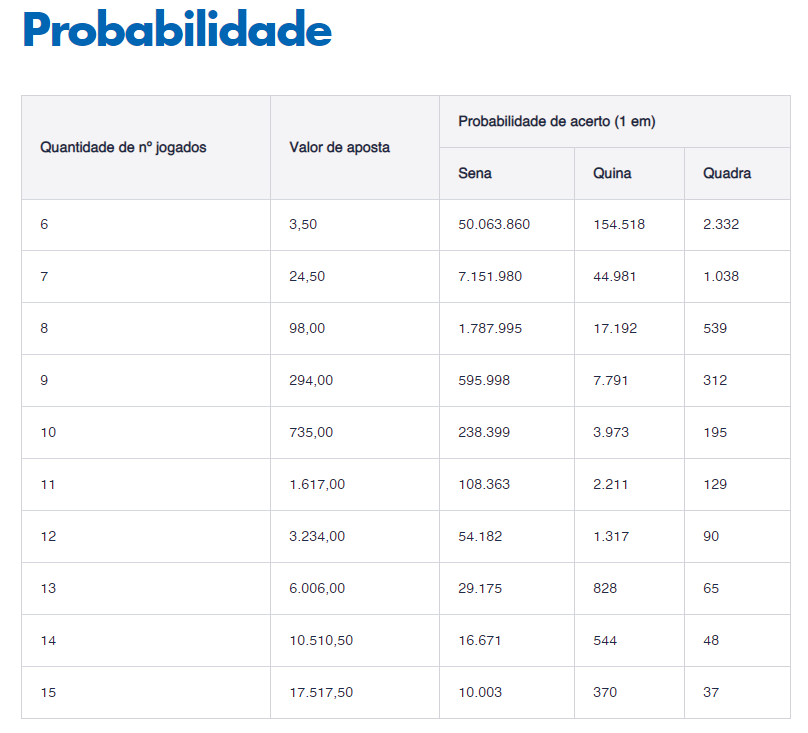

In [39]:
# Tabela de probalidades segundo a Caixa Econômica Federal

from IPython.display import Image
Image("Probabilidades.png")

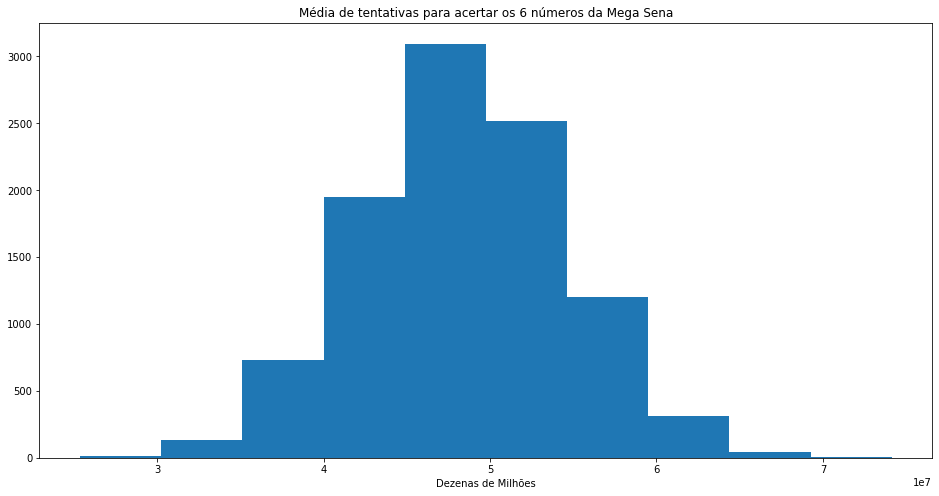

In [19]:
# Gráfico para mostrar a distribuição das médias de tentativas.
# Mais uma vez, conforme esperado, temos uma distribuição normal.

plt.figure(figsize=(16,8))
plt.hist(boots)
plt.title('Média de tentativas para acertar os 6 números da Mega Sena')
plt.xlabel('Dezenas de Milhões')
plt.show()

## Utilizando LSTM para prever um jogo vencedor

In [20]:
# Importando os pacotes
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [21]:
# Organizando os dados para o formato correto de input
num_sorteado = np.array(jogos).flatten()

In [22]:
# Pré-processamento e criação do dataset de treino
seq_in = []
out = []

for i in range(len(num_sorteado)-8):
    seq_in.append(list(num_sorteado[i:i+6]))
    out.append(num_sorteado[i+7])
    
X = np.array(seq_in)
y = np.array(out)

In [23]:
# Dados de entrada organizado a cada 6 dezenas sorteadas
X = X.reshape(X.shape[0], 6, 1)

# Transformando números sorteados em categorias One Hot Encoding
hot = OneHotEncoder(sparse=False, categories='auto')
y_one = hot.fit_transform(y.reshape(len(y), 1))

In [29]:
# Criação e treinamento do modelo
model = Sequential()

model.add(LSTM(36, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(120, activation='elu'))
model.add(Dense(y_one.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X, y_one, epochs=10, verbose=1)

Epoch 1/10
13060/13060 [==============================] - 10s 762us/step - loss: 3.7775 - acc: 0.0410
Epoch 2/10
13060/13060 [==============================] - 9s 688us/step - loss: 3.4201 - acc: 0.0594
Epoch 3/10
13060/13060 [==============================] - 9s 687us/step - loss: 3.3863 - acc: 0.0627
Epoch 4/10
13060/13060 [==============================] - 9s 689us/step - loss: 3.3735 - acc: 0.0629
Epoch 5/10
13060/13060 [==============================] - 9s 689us/step - loss: 3.3647 - acc: 0.0626
Epoch 6/10
13060/13060 [==============================] - 9s 691us/step - loss: 3.3609 - acc: 0.0642
Epoch 7/10
13060/13060 [==============================] - 9s 689us/step - loss: 3.3536 - acc: 0.0653
Epoch 8/10
13060/13060 [==============================] - 9s 690us/step - loss: 3.3538 - acc: 0.0622
Epoch 9/10
13060/13060 [==============================] - 9s 693us/step - loss: 3.3481 - acc: 0.0608 1s - los
Epoch 10/10
13060/13060 [==============================] - 9s 690us/step - loss: 

In [25]:
# Resumo do modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 36)                5472      
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4440      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
Total params: 17,172
Trainable params: 17,172
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Análise preditiva
numeros_previstos = []

for i in range(len(jogos)):
    X_teste = np.array(jogos[i])
    X_teste = X_teste.reshape(1, X_teste.shape[0], 1)
    predicted = model.predict(X_teste)
    numeros_previstos.append(np.argmax(predicted))

# Tentamos organizar os números para prever as dezenas mais prováveis de serem sorteadas.
numeros_previstos = pd.Series(numeros_previstos).unique()
numeros_previstos = list(numeros_previstos)
numeros_previstos.sort()

In [56]:
# Numeros previstos como mais provaveis:
print(numeros_previstos)

q_mais = 0
q_menos = 0

for n in numeros_previstos:
    if n in mais:
        q_mais += 1
    elif n in menos:
        q_menos += 1
        
print(f'\nTemos {q_mais} dos números previstos entre os mais frequentes.')
print(f'\nTemos {q_menos} dos números previstos entre os menos frequentes.')

[9, 10, 11, 12, 13, 15, 17, 22, 26, 31, 35, 58]

Temos 1 dos números previstos entre os mais frequentes.

Temos 4 dos números previstos entre os menos frequentes.


In [57]:
prev = []

for jogo in jogos:
    c = 0
    for n in jogo:
        if n in numeros_previstos:
            c += 1
    if c == 6:
        print(jogo)
        break
    prev.append(c)

print(f'''Utilizando os {len(numeros_previstos)} números mais prováveis previstos pelo modelo,
tivemos uma média de acerto de {sum(prev)/len(prev):.2f} números considerando todos os 2178 sorteios.''')

Utilizando os 12 números mais prováveis previstos pelo modelo,
tivemos uma média de acerto de 1.17 números considerando todos os 2178 sorteios.


## Conclusão:

* Como o fenomeno dos sorteios é completamente aleatório, o modelo não foi capaz de prever os números de forma acertiva. 

* Para avaliar o aprendizado do modelo, a expectativa era que ele fosse enviezado para buscar os números mais frequentes, o que não se mostrou na análise, sendo que 4 dos 12 estão presentes entre os números menos frequentes e apenas 1 entre os mais. 


# FIM!